***UNMIXING***

In [1]:
#Imports
import os
import sys
sys.path.insert(1,'./src')
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')
from read_funcs import read_prs_l2d, make_rgb, make_rgb_dc,reflectance_norm,get_coord_id,append_new_line,make_rgb_aerial,band_pairing
from find_nearest import find_nearest
#from idx_mesh import idx_mesh
from img_list import prs_list
from datetime import datetime
import pathlib
from PIL import Image
import rasterio as rio
from osgeo import gdal
import h5py
import math

In [11]:
path_l2d = "../DATABASE/"
aerial_path="../DATABASE/aerial/"
name='Gad161022'
save=True

In [3]:
#import abundance map created by GEE
src = rio.open(path_l2d+name+'_fractions.tif')
fractions=src.read()
src.close()
fractions=np.moveaxis(fractions,0,2)
print(np.shape(fractions))

(472, 500, 5)


0.0


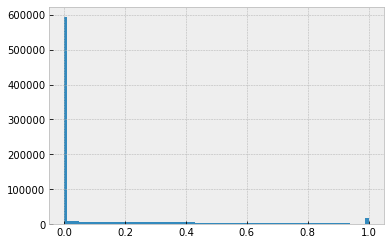

In [4]:
plt.hist(fractions.ravel(),bins=100)
print(np.nanmin(fractions))

/var/folders/_3/xbqrb2pn61xbq3bc9w9ss3ww0000gn/T/ipykernel_1977/1830956539.py:17: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


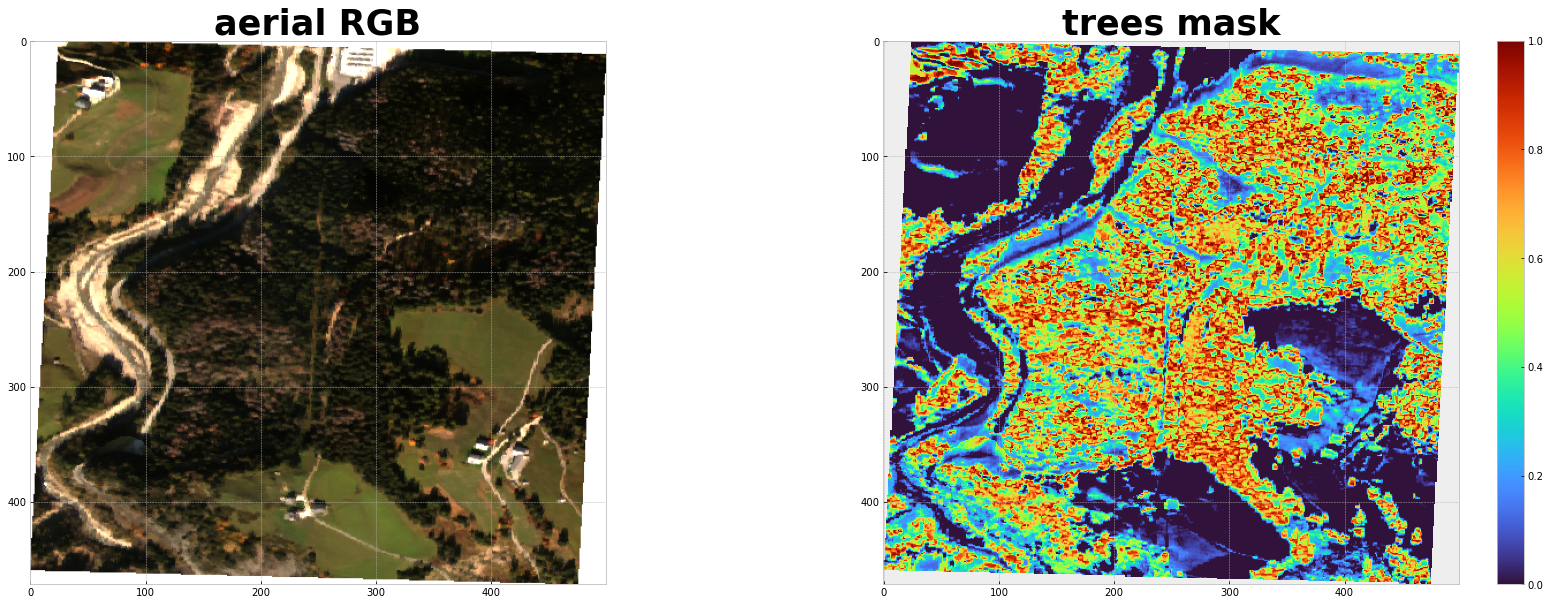

In [5]:
#plot rgb image and trees abundances
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
src_aerial = rio.open(path_l2d+'aerial/'+'Gadertal_area5_EPSG4326.tif')
aerial_intersected_cube=src_aerial.read()
src_aerial.close()
aerial_intersected_cube=np.moveaxis(aerial_intersected_cube,0,2)
rgb_aerial = make_rgb_aerial(aerial_intersected_cube)
threshold=1500
rgb_aerial[rgb_aerial>threshold]=threshold
rgb_aerial=rgb_aerial/threshold
plt.imshow(rgb_aerial)
plt.title('aerial RGB',fontsize=35,fontweight='bold')
plt.subplot(1,2,2)
plt.imshow(fractions[:,:,0],cmap='turbo')
plt.title('trees mask',fontsize=35,fontweight='bold')
plt.colorbar()

/var/folders/_3/xbqrb2pn61xbq3bc9w9ss3ww0000gn/T/ipykernel_1977/363383774.py:13: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


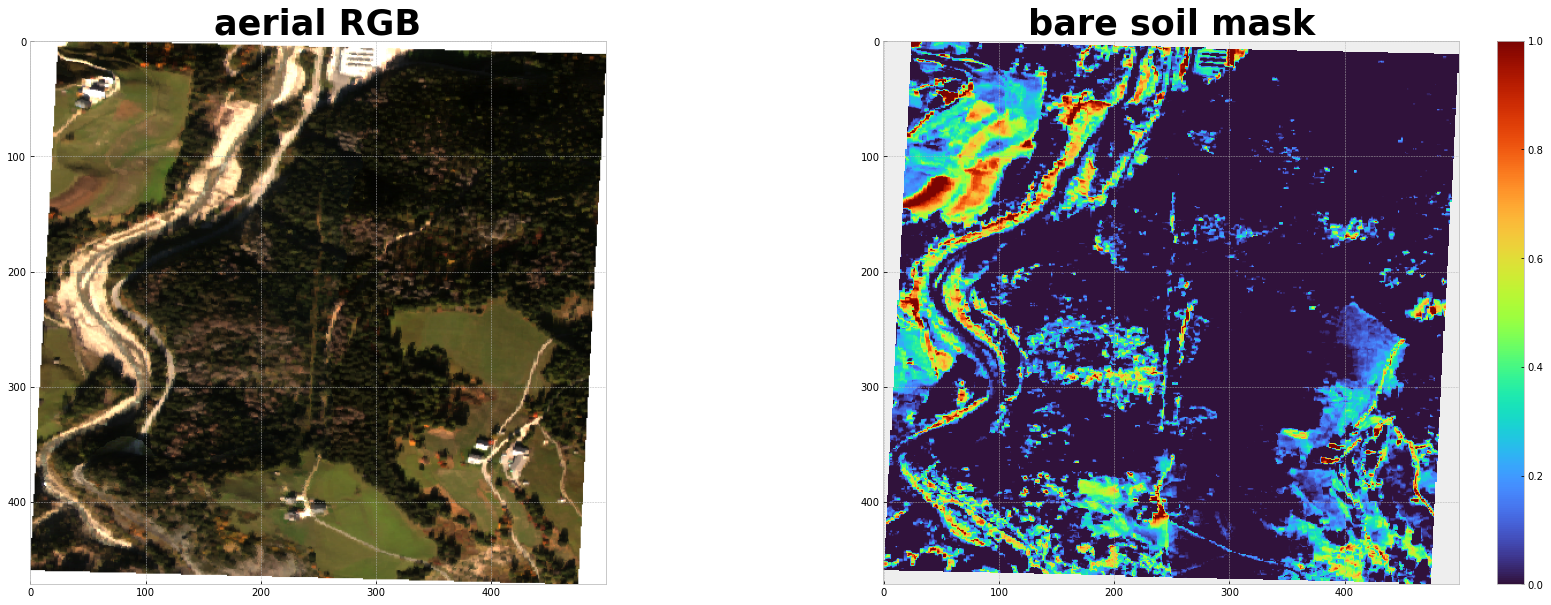

In [6]:
#plot rgb image and bare soil abundances
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
plt.imshow(rgb_aerial)
plt.title('aerial RGB',fontsize=35,fontweight='bold')
plt.subplot(1,2,2)
plt.imshow(fractions[:,:,1],cmap='turbo')
plt.title('bare soil mask',fontsize=35,fontweight='bold')
plt.colorbar()

/var/folders/_3/xbqrb2pn61xbq3bc9w9ss3ww0000gn/T/ipykernel_1977/1914173036.py:13: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


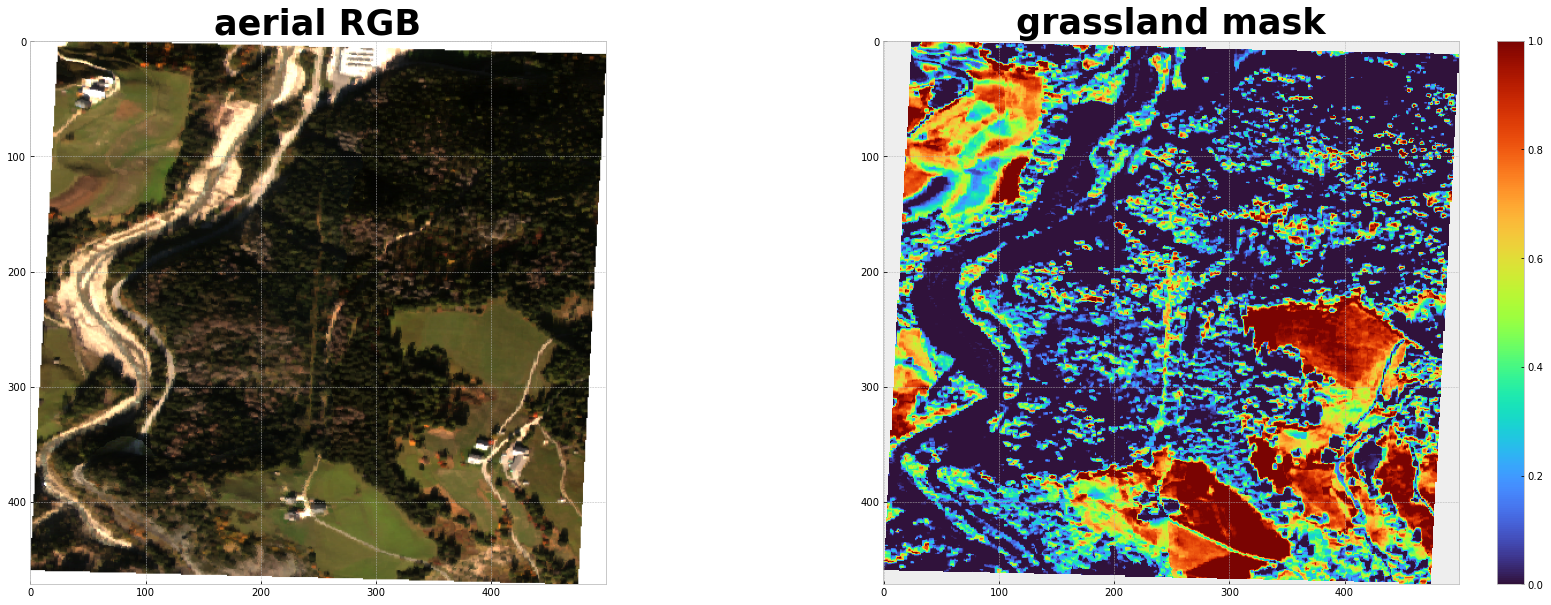

In [7]:
#plot rgb image and grassland abundances
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
plt.imshow(rgb_aerial)
plt.title('aerial RGB',fontsize=35,fontweight='bold')
plt.subplot(1,2,2)
plt.imshow(fractions[:,:,2],cmap='turbo')
plt.title('grassland mask',fontsize=35,fontweight='bold')
plt.colorbar()

/var/folders/_3/xbqrb2pn61xbq3bc9w9ss3ww0000gn/T/ipykernel_1977/1451553954.py:13: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


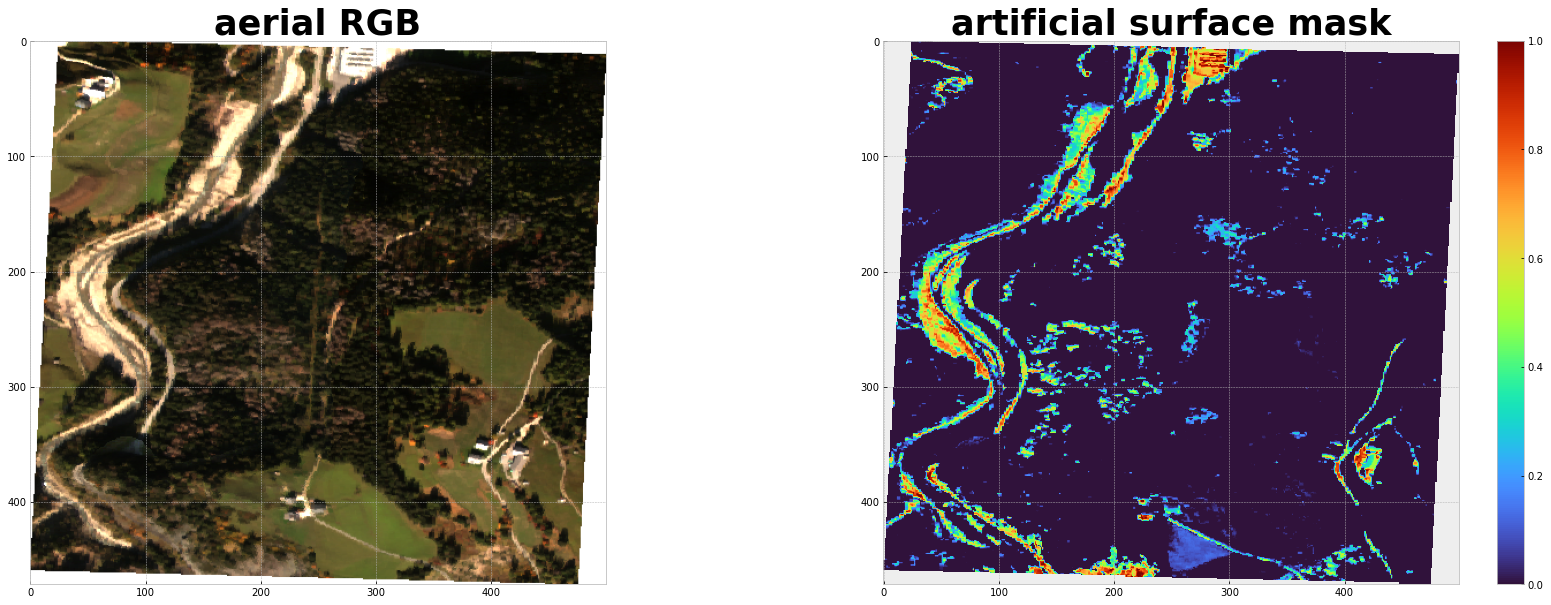

In [8]:
#plot rgb image and artificial surface abundances
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
plt.imshow(rgb_aerial)
plt.title('aerial RGB',fontsize=35,fontweight='bold')
plt.subplot(1,2,2)
plt.imshow(fractions[:,:,3],cmap='turbo')
plt.title('artificial surface mask',fontsize=35,fontweight='bold')
plt.colorbar()

/var/folders/_3/xbqrb2pn61xbq3bc9w9ss3ww0000gn/T/ipykernel_1977/3710115592.py:13: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


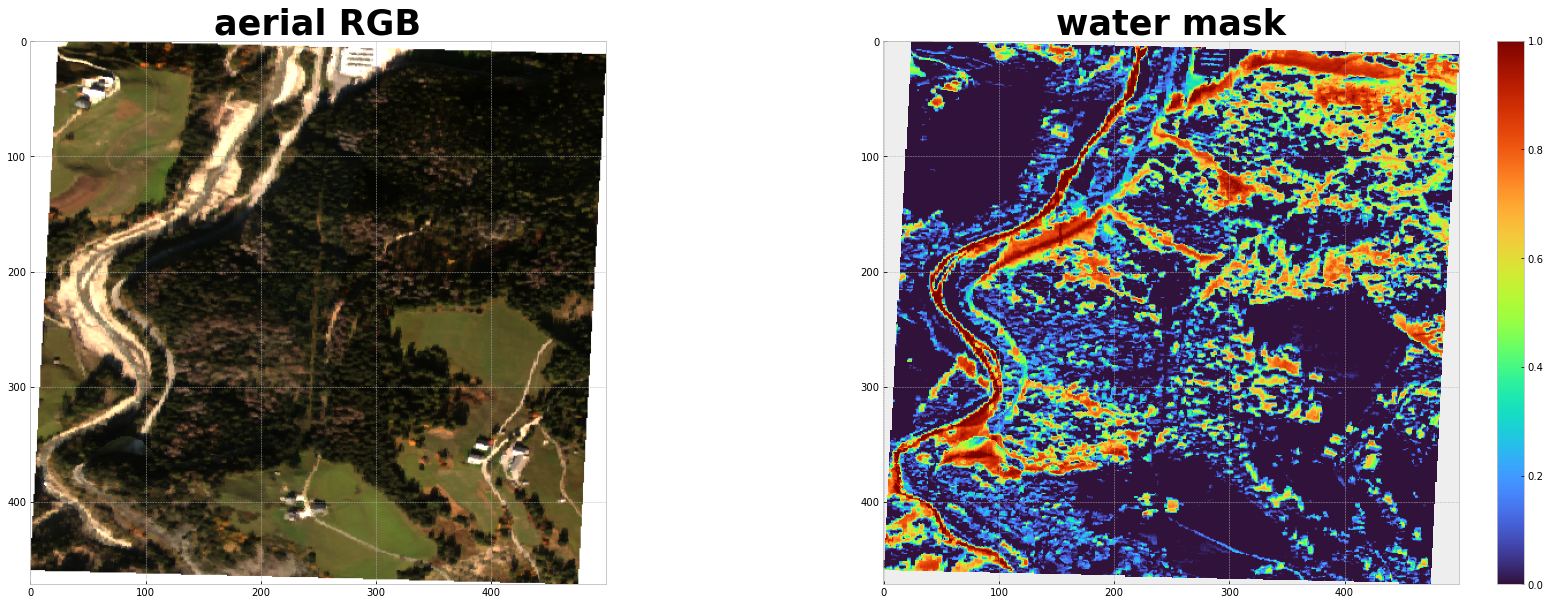

In [9]:
#plot rgb image and water abundances
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
plt.imshow(rgb_aerial)
plt.title('aerial RGB',fontsize=35,fontweight='bold')
plt.subplot(1,2,2)
plt.imshow(fractions[:,:,4],cmap='turbo')
plt.title('water mask',fontsize=35,fontweight='bold')
plt.colorbar()

Text(0.5, 1.0, 'aerial RGB')

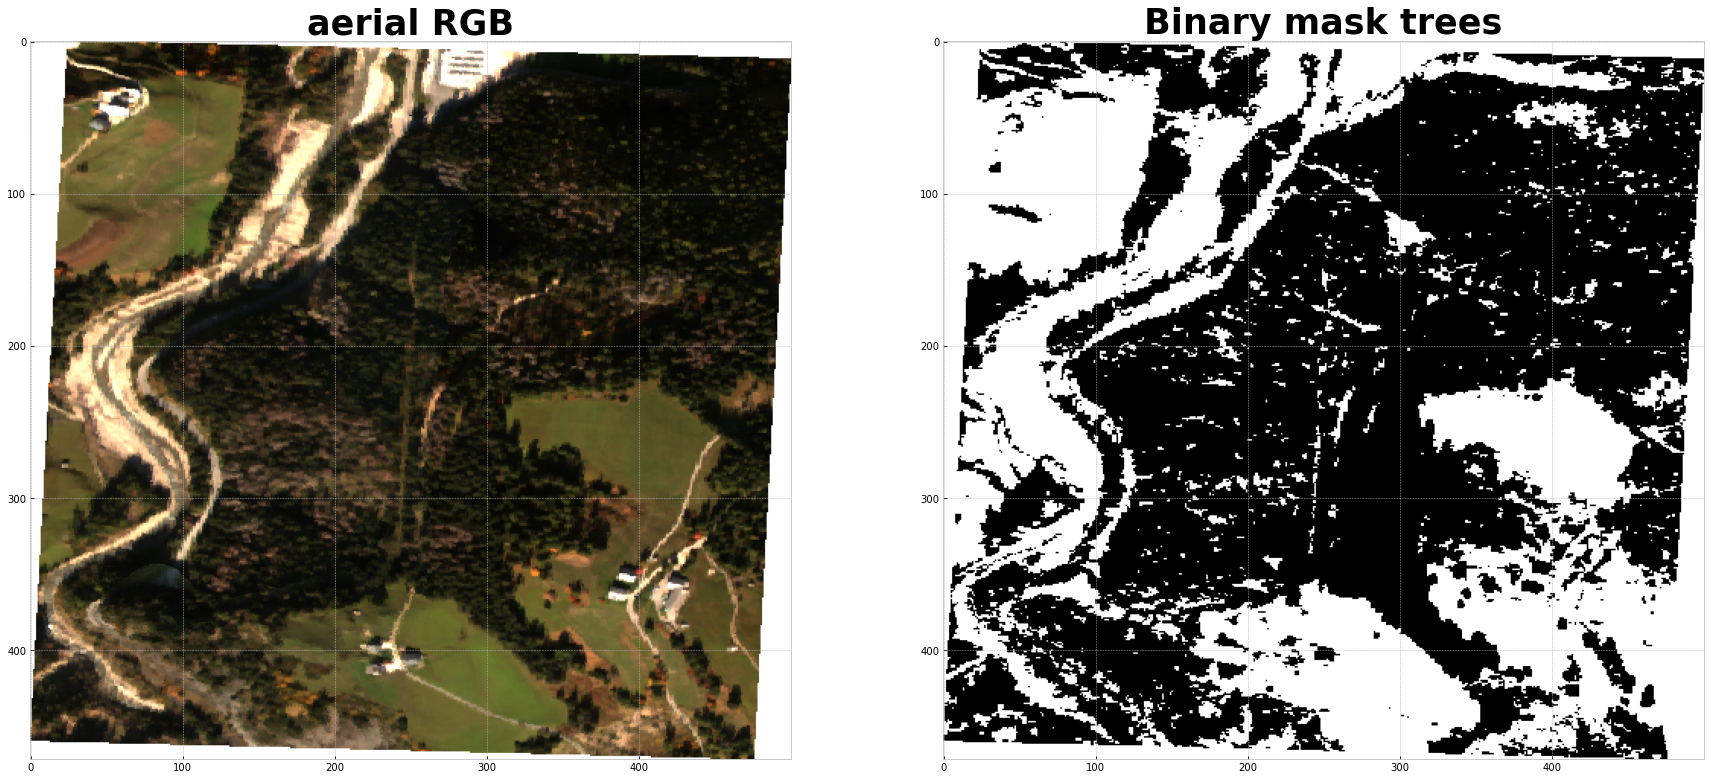

In [28]:
#create binary mask for trees
plt.figure(figsize=(30,20))
plt.subplot(1,2,2)
binary_trees=np.where(fractions[:,:,0]>0.2,1,0)
if save:
    np.save(aerial_path+name+'_trees_mask',binary_trees)
plt.imshow(binary_trees,cmap='binary')
plt.title("Binary mask trees",fontsize=35,fontweight='bold')
plt.subplot(1,2,1)
plt.imshow(rgb_aerial)
plt.title('aerial RGB',fontsize=35,fontweight='bold')